## DATA PREPROCESSING AND FEATURE ENGINEERING

In [9]:
#importing the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
pip install opendatasets


     ---------------------------------------- 0.0/83.6 kB ? eta -:--:--
     -------------- ------------------------- 30.7/83.6 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 83.6/83.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110697 sha256=88590ea6d884fd553377b53aa4eccfb591855a5c34d167913fa76db55652c9a6
  Stored in directory: c:\users\navya\appdata\local\pip\cache\wheels\6a\2b\d0\457dd27de499e9423caf738e743c4a3f82886ee6b19f89d5b7
Successfully built kaggle


In [10]:
import opendatasets as od
od.download(
    'https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction')

Skipping, found downloaded files in ".\bank-customer-churn-prediction" (use force=True to force download)


In [12]:
#Loading the dataset
cust_data = pd.read_csv('bank-customer-churn-prediction/Churn_Modelling.csv')

In [13]:
cust_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
cust_data.shape

(10000, 14)

In [15]:
cust_data.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [16]:
cust_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [18]:
100*cust_data['Exited'].value_counts()/len(cust_data['Exited'])

0    79.63
1    20.37
Name: Exited, dtype: float64

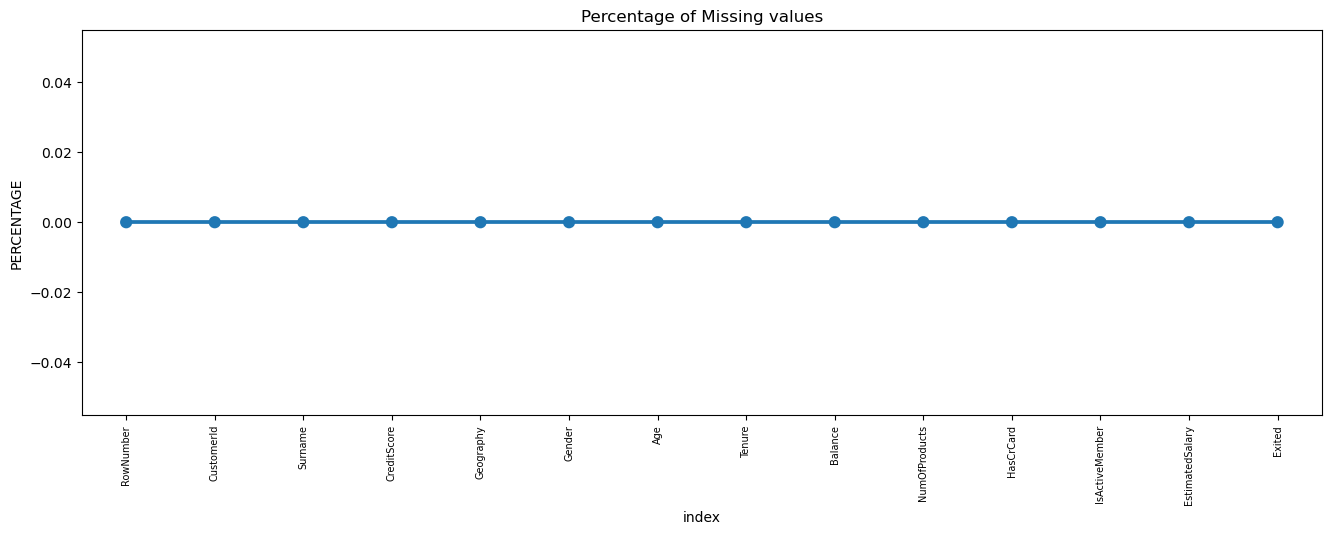

In [19]:
#Checking for missing values
missing = pd.DataFrame((cust_data.isnull().sum())*100/cust_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [20]:
#Creating a copy of data for manipulation and preprocessing
data=cust_data.copy()

In [21]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values in the data.

In [35]:
# Grouping the subscription length in bins of 12 months
labels = ["{0} - {1}".format(i, i + 4) for i in range(0, 15, 5)]

data['Tenure_Group'] = pd.cut(data.Tenure, range(0, 20, 5), right=False, labels=labels)

In [26]:
data['Tenure'].max()

10

In [36]:
data['Tenure_Group'].value_counts()

5 - 9      5016
0 - 4      4494
10 - 14     490
Name: Tenure_Group, dtype: int64

In [38]:
#Removing columns not required for processing
data.drop(columns= ['CustomerId','Surname','Tenure','RowNumber'], axis=1, inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tenure_Group
0,619,France,Female,42,0.00,1,1,1,101348.88,1,0 - 4
1,608,Spain,Female,41,83807.86,1,0,1,112542.58,0,0 - 4
2,502,France,Female,42,159660.80,3,1,0,113931.57,1,5 - 9
3,699,France,Female,39,0.00,2,0,0,93826.63,0,0 - 4
4,850,Spain,Female,43,125510.82,1,1,1,79084.10,0,0 - 4


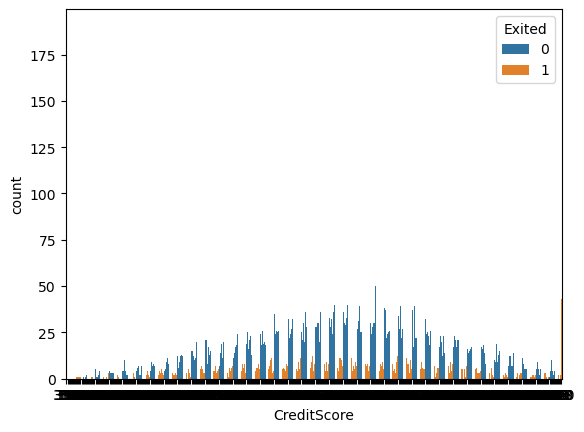

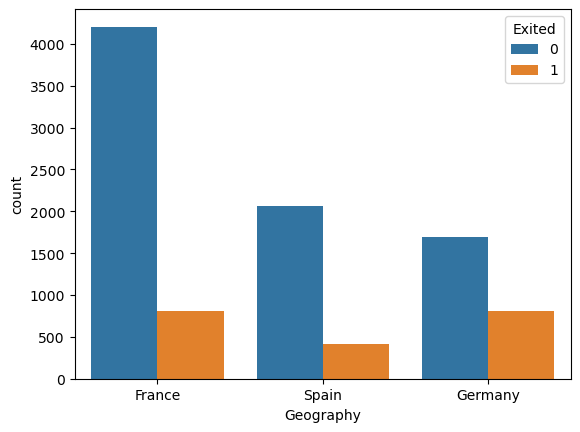

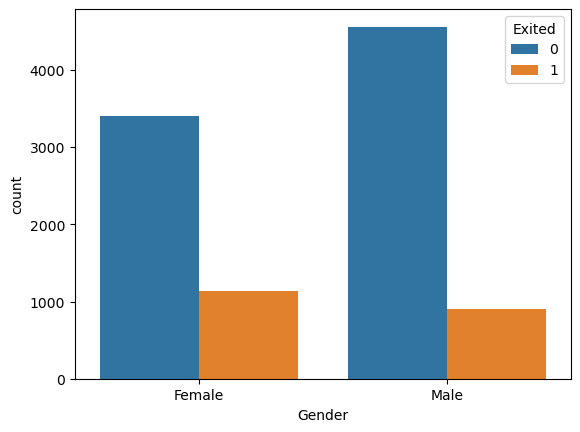

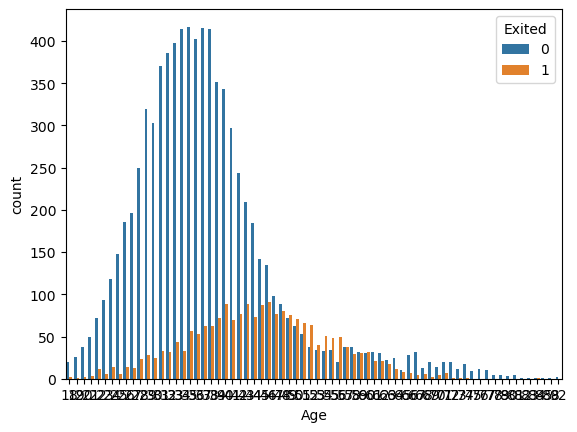

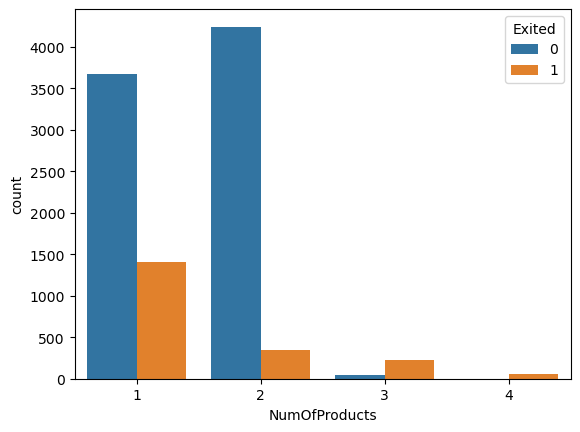

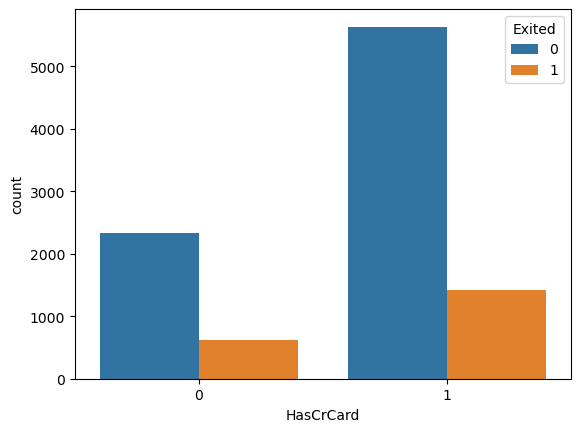

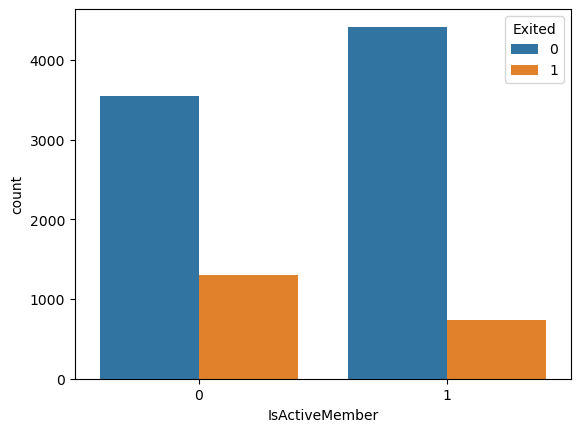

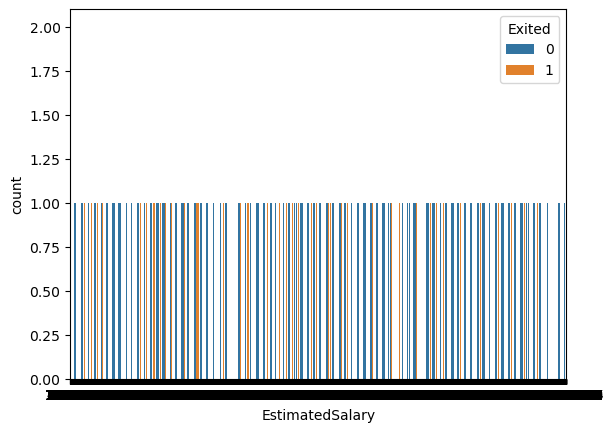

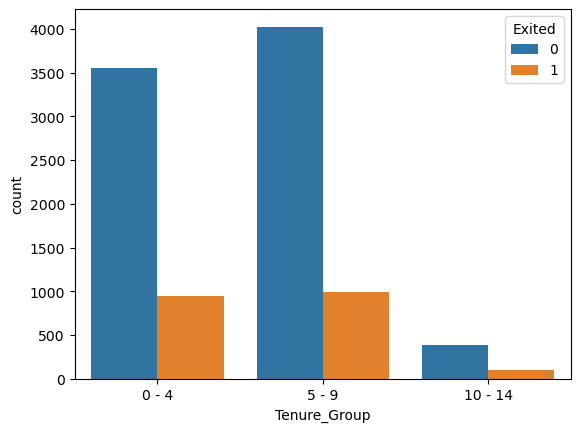

In [39]:
#visualising churn against every independent variable
for i, predictor in enumerate(data.drop(columns=['Exited', 'Balance'])):
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='Exited')

In [40]:
#one hot encoding
data_dummies = pd.get_dummies(data)
data_dummies.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Tenure_Group_0 - 4,Tenure_Group_5 - 9,Tenure_Group_10 - 14
0,619,42,0.00,1,1,1,101348.88,1,1,0,0,1,0,1,0,0
1,608,41,83807.86,1,0,1,112542.58,0,0,0,1,1,0,1,0,0
2,502,42,159660.80,3,1,0,113931.57,1,1,0,0,1,0,0,1,0
3,699,39,0.00,2,0,0,93826.63,0,1,0,0,1,0,1,0,0
4,850,43,125510.82,1,1,1,79084.10,0,0,0,1,1,0,1,0,0


Text(0.5, 1.0, 'Balancel by churn')

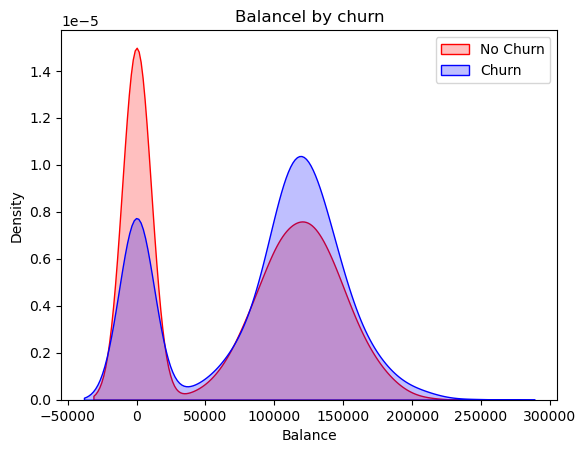

In [42]:
#monthly bill by churn
Mth = sns.kdeplot(data_dummies.Balance[(data_dummies["Exited"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(data_dummies.Balance[(data_dummies["Exited"] == 1) ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Balance')
Mth.set_title('Balancel by churn')

In [43]:
data_dummies.to_csv('bank_churn.csv')